In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
import torch.nn.functional as F
import tqdm
from tqdm import tnrange

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [5]:
df.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [6]:
split_data = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";")

data = split_data.to_list()

names = ["Fixed_acidity", "Volatile_acidity", "Citric_acid", "Residual_sugar", "Chlorides", "Free_sulfur_dioxide", "Total_sulfur_Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality"]

df2 = pd.DataFrame(data, columns=names)

In [7]:
df2.head()

,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


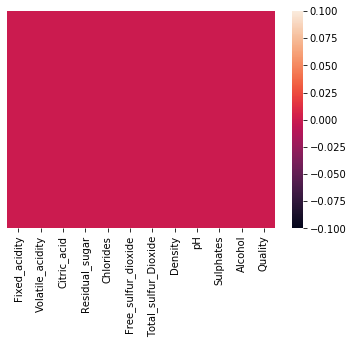

In [8]:
sn.heatmap(df2.isnull(), yticklabels=False)

In [9]:
df2.isnull().values.any() # no null values

False

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fixed_acidity         1599 non-null   object
 1   Volatile_acidity      1599 non-null   object
 2   Citric_acid           1599 non-null   object
 3   Residual_sugar        1599 non-null   object
 4   Chlorides             1599 non-null   object
 5   Free_sulfur_dioxide   1599 non-null   object
 6   Total_sulfur_Dioxide  1599 non-null   object
 7   Density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   Sulphates             1599 non-null   object
 10  Alcohol               1599 non-null   object
 11  Quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [12]:
df3 = df2.astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed_acidity         1599 non-null   float64
 1   Volatile_acidity      1599 non-null   float64
 2   Citric_acid           1599 non-null   float64
 3   Residual_sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free_sulfur_dioxide   1599 non-null   float64
 6   Total_sulfur_Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


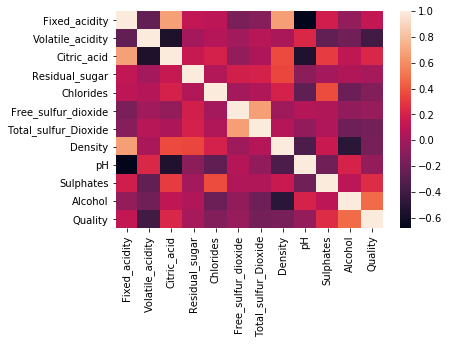

In [138]:
# corr matrix
sn.heatmap(df3.corr())
plt.show()

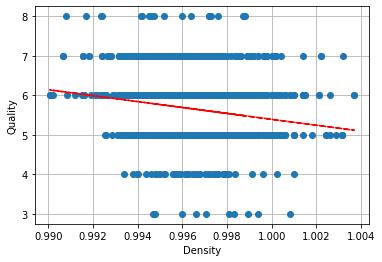

In [14]:
attribute="Density"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

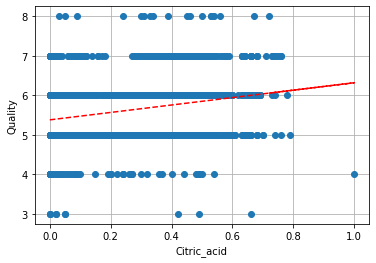

In [15]:
attribute="Citric_acid"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

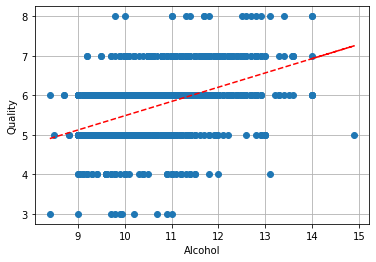

In [16]:
attribute="Alcohol"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

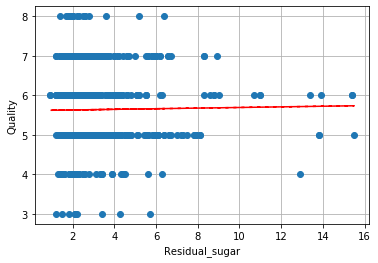

In [17]:
attribute="Residual_sugar"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [18]:
# Scale

quality_backup = df3["Quality"]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)
df_scaled['Quality'] = quality_backup #restore quality values
df_scaled.head()


,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5.0


In [19]:
#Split.

train = df_scaled.iloc[:1300]
val = df_scaled.iloc[1300:1400]
test = df_scaled.iloc[1400:]

X_train, y_train= train.drop('Quality', axis=1), train['Quality']
print(X_train.shape)

X_val, y_val = val.drop('Quality', axis=1), val['Quality']
print(X_val.shape)

X_test, y_test = test.drop("Quality", axis=1), test["Quality"]

(1300, 11)
(100, 11)


In [20]:
train_batch = np.array_split(X_train, 50) 
label_batch = np.array_split(y_train, 50) # 50 sections/batches

val_batch = np.array_split(X_val, 50)
val_label_batch = np.array_split(y_val, 50)

test_batch = np.array_split(X_test, 50) 
test_label_batch  = np.array_split(y_test, 50)

In [21]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)
    
for i in range(len(val_batch)):
    val_batch[i] = torch.from_numpy(val_batch[i].values).float()
for i in range(len(val_label_batch)):
    val_label_batch[i] = torch.from_numpy(val_label_batch[i].values).float().view(-1, 1)
    
    
    
for i in range(len(test_batch)):
    test_batch[i] = torch.from_numpy(test_batch[i].values).float()
for i in range(len(test_label_batch)):
    test_label_batch[i] = torch.from_numpy(test_label_batch[i].values).float().view(-1, 1)
    
    
    

In [22]:
print(len(train_batch[0]))
print(len(label_batch))
print(len(val_batch))
print(len(val_label_batch))
print(len(train_batch[0][0]))

26
50
50
50
11


In [121]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(11, 7)
        self.fc2 = nn.Linear(7, 7)
        self.fc3 = nn.Linear(7, 1)
        
      

    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
    

        return x

### Notes:

1. optimizer.zero_grad() PyTorch's autograd simply accumulates the gradients for each model parameter. Thus for each epoch, one has to clear the existing gradients.

2. loss.backward() does the backward pass of the model and accumulates the gradients for each model parameter.

3. optimizer.step() computes the weight update for each model parameter and applies them.

In [152]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 1000
train_losses, val_losses = [], []


scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)


for e in tnrange(epochs):
    
    model.train()
    train_loss = 0
    val_loss_1=0
    val_loss_sum = 0
    
    for i in range(len(train_batch)):
        
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = criterion(output, label_batch[i])
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
      
        with torch.no_grad():
            
            for j in range(len(val_batch)):
                
                val_output = model(val_batch[j])
                val_loss =  criterion(val_output, val_label_batch[j])
                val_loss_1+=val_loss.item()
        val_loss_sum=val_loss_1/len(val_batch)
        
        
    print("Epoch :", e, "train_loss :", train_loss/len(train_batch), "Val loss: ", val_loss_sum/len(val_batch))    
    val_losses.append(val_loss_sum/len(val_batch))    
    train_losses.append(train_loss/len(train_batch))

/home/mainak09/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # This is added back by InteractiveShellApp.init_path()


Epoch : 0 train_loss : 30.668020782470702 Val loss:  27.495790131759644
Epoch : 1 train_loss : 26.307801551818848 Val loss:  23.422358567047116
Epoch : 2 train_loss : 18.676071166992188 Val loss:  16.4436557762146
Epoch : 3 train_loss : 9.02557834148407 Val loss:  7.808618805909157
Epoch : 4 train_loss : 2.3674014520645144 Val loss:  1.9788246332830024
Epoch : 5 train_loss : 0.8640545397996903 Val loss:  0.633609761684855
Epoch : 6 train_loss : 0.8343853241205216 Val loss:  0.5757107862233417
Epoch : 7 train_loss : 0.8274162155389786 Val loss:  0.5678828777505405
Epoch : 8 train_loss : 0.8158116793632507 Val loss:  0.5591346425314666
Epoch : 9 train_loss : 0.804123347401619 Val loss:  0.5502398457130941
Epoch : 10 train_loss : 0.7922291612625122 Val loss:  0.5412346136237014
Epoch : 11 train_loss : 0.7802036106586456 Val loss:  0.5321540033038569
Epoch : 12 train_loss : 0.768112710416317 Val loss:  0.5229999097663033
Epoch : 13 train_loss : 0.7559903889894486 Val loss:  0.5136562316968

Epoch : 112 train_loss : 0.43207679837942126 Val loss:  0.2862322868753225
Epoch : 113 train_loss : 0.43173992574214937 Val loss:  0.2861210981190204
Epoch : 114 train_loss : 0.43142190486192705 Val loss:  0.2860239159440156
Epoch : 115 train_loss : 0.4311159044504166 Val loss:  0.2859403474225197
Epoch : 116 train_loss : 0.43082120299339294 Val loss:  0.28586868444439023
Epoch : 117 train_loss : 0.43053725451231 Val loss:  0.2858076245236211
Epoch : 118 train_loss : 0.4302637878060341 Val loss:  0.2857566242676228
Epoch : 119 train_loss : 0.4299997639656067 Val loss:  0.28571632805177943
Epoch : 120 train_loss : 0.429760684967041 Val loss:  0.2856815879027359
Epoch : 121 train_loss : 0.42951889365911483 Val loss:  0.2856519093147479
Epoch : 122 train_loss : 0.42928421139717104 Val loss:  0.28562739953314886
Epoch : 123 train_loss : 0.42905301570892335 Val loss:  0.2856112534557469
Epoch : 124 train_loss : 0.4288461261987686 Val loss:  0.2856103983500041
Epoch : 125 train_loss : 0.4286

Epoch : 222 train_loss : 0.42335742205381394 Val loss:  0.28810185450008136
Epoch : 223 train_loss : 0.42334850013256076 Val loss:  0.28812467640633693
Epoch : 224 train_loss : 0.42332120180130006 Val loss:  0.28814400121211076
Epoch : 225 train_loss : 0.42334464222192764 Val loss:  0.2881280107723083
Epoch : 226 train_loss : 0.4233204871416092 Val loss:  0.28815081770680845
Epoch : 227 train_loss : 0.42331072837114336 Val loss:  0.28816969439107926
Epoch : 228 train_loss : 0.42327373594045636 Val loss:  0.2881830639983062
Epoch : 229 train_loss : 0.4233203592896462 Val loss:  0.288189506692905
Epoch : 230 train_loss : 0.42327893286943435 Val loss:  0.28820304878405295
Epoch : 231 train_loss : 0.42327717155218125 Val loss:  0.2882015651108697
Epoch : 232 train_loss : 0.42329818129539487 Val loss:  0.28819632739708756
Epoch : 233 train_loss : 0.4232562932372093 Val loss:  0.28821147302994504
Epoch : 234 train_loss : 0.4232539114356041 Val loss:  0.2882116040608846
Epoch : 235 train_loss

Epoch : 332 train_loss : 0.42254031509160994 Val loss:  0.2882658251605928
Epoch : 333 train_loss : 0.42251916110515597 Val loss:  0.2882671872594394
Epoch : 334 train_loss : 0.42251200675964357 Val loss:  0.288277144332882
Epoch : 335 train_loss : 0.4225208595395088 Val loss:  0.2882589677941985
Epoch : 336 train_loss : 0.42248511224985125 Val loss:  0.288298776168935
Epoch : 337 train_loss : 0.4225163611769676 Val loss:  0.2882518113953993
Epoch : 338 train_loss : 0.42247151464223864 Val loss:  0.28830770225413144
Epoch : 339 train_loss : 0.4224914237856865 Val loss:  0.2882591220890172
Epoch : 340 train_loss : 0.422469861805439 Val loss:  0.28826418792838227
Epoch : 341 train_loss : 0.4224787762761116 Val loss:  0.2882470269647427
Epoch : 342 train_loss : 0.4224433270096779 Val loss:  0.2882880737230182
Epoch : 343 train_loss : 0.42247468173503877 Val loss:  0.28824117348464207
Epoch : 344 train_loss : 0.42243022978305816 Val loss:  0.28829790574042125
Epoch : 345 train_loss : 0.422

Epoch : 442 train_loss : 0.4217913916707039 Val loss:  0.2879545394548215
Epoch : 443 train_loss : 0.42180116057395933 Val loss:  0.2879460781389847
Epoch : 444 train_loss : 0.42177113741636274 Val loss:  0.2879711395693943
Epoch : 445 train_loss : 0.42176186710596086 Val loss:  0.28793705768371003
Epoch : 446 train_loss : 0.4217632558941841 Val loss:  0.28792699389811605
Epoch : 447 train_loss : 0.4217732062935829 Val loss:  0.2879231700311415
Epoch : 448 train_loss : 0.42172892302274706 Val loss:  0.28794582393383605
Epoch : 449 train_loss : 0.42174928307533266 Val loss:  0.2879207000574097
Epoch : 450 train_loss : 0.4217157554626465 Val loss:  0.2879443348167464
Epoch : 451 train_loss : 0.4217216941714287 Val loss:  0.2879160916364752
Epoch : 452 train_loss : 0.4217298194766045 Val loss:  0.28789679578272626
Epoch : 453 train_loss : 0.4216947290301323 Val loss:  0.2879257284413092
Epoch : 454 train_loss : 0.4217161762714386 Val loss:  0.2879034878646955
Epoch : 455 train_loss : 0.42

Epoch : 552 train_loss : 0.42053163588047027 Val loss:  0.28706602234328166
Epoch : 553 train_loss : 0.42052118211984635 Val loss:  0.2870506079278886
Epoch : 554 train_loss : 0.42051060885190966 Val loss:  0.28703486347943546
Epoch : 555 train_loss : 0.4204998952150345 Val loss:  0.287018961967621
Epoch : 556 train_loss : 0.420488940179348 Val loss:  0.28700292285485196
Epoch : 557 train_loss : 0.4204779288172722 Val loss:  0.2869870045159012
Epoch : 558 train_loss : 0.42046673864126205 Val loss:  0.286971148403082
Epoch : 559 train_loss : 0.4204555204510689 Val loss:  0.2869554497813806
Epoch : 560 train_loss : 0.4204234975576401 Val loss:  0.2869215441038832
Epoch : 561 train_loss : 0.42042592346668245 Val loss:  0.28691583781475205
Epoch : 562 train_loss : 0.420406699180603 Val loss:  0.2868972233391367
Epoch : 563 train_loss : 0.4204074016213417 Val loss:  0.28688178052837027
Epoch : 564 train_loss : 0.4204089516401291 Val loss:  0.2869012355599552
Epoch : 565 train_loss : 0.42040

Epoch : 662 train_loss : 0.41727022767066957 Val loss:  0.2901766646232456
Epoch : 663 train_loss : 0.4172243767976761 Val loss:  0.2902542612186633
Epoch : 664 train_loss : 0.4171821409463882 Val loss:  0.2903103982967325
Epoch : 665 train_loss : 0.417138157337904 Val loss:  0.29034893024675545
Epoch : 666 train_loss : 0.41708853796124457 Val loss:  0.29038444142472
Epoch : 667 train_loss : 0.4170382688939571 Val loss:  0.29041117306044323
Epoch : 668 train_loss : 0.4169779631495476 Val loss:  0.2904382060619071
Epoch : 669 train_loss : 0.41691498398780824 Val loss:  0.29049192883772773
Epoch : 670 train_loss : 0.41684902876615526 Val loss:  0.29052828040374445
Epoch : 671 train_loss : 0.41673188269138334 Val loss:  0.2905778640653007
Epoch : 672 train_loss : 0.4166037632524967 Val loss:  0.2906377662704326
Epoch : 673 train_loss : 0.41649975299835207 Val loss:  0.2906835133323446
Epoch : 674 train_loss : 0.4164240448176861 Val loss:  0.29074617796353996
Epoch : 675 train_loss : 0.416

Epoch : 772 train_loss : 0.4094702897965908 Val loss:  0.28970293497778477
Epoch : 773 train_loss : 0.4093420287966728 Val loss:  0.28966617210339757
Epoch : 774 train_loss : 0.40927660688757894 Val loss:  0.2896458501717076
Epoch : 775 train_loss : 0.4092999003827572 Val loss:  0.2896685053626075
Epoch : 776 train_loss : 0.4091730950772762 Val loss:  0.28962692168522625
Epoch : 777 train_loss : 0.4091090548038483 Val loss:  0.2896010147072375
Epoch : 778 train_loss : 0.40905856400728224 Val loss:  0.28957468571979555
Epoch : 779 train_loss : 0.4089962513744831 Val loss:  0.2895644483765587
Epoch : 780 train_loss : 0.40893534660339353 Val loss:  0.2895364633241668
Epoch : 781 train_loss : 0.4088780917227268 Val loss:  0.28950984531082213
Epoch : 782 train_loss : 0.40881311789155006 Val loss:  0.28950109055023643
Epoch : 783 train_loss : 0.4087566137313843 Val loss:  0.2894697265792638
Epoch : 784 train_loss : 0.4086926294863224 Val loss:  0.2894535333128646
Epoch : 785 train_loss : 0.4

Epoch : 882 train_loss : 0.4040910752117634 Val loss:  0.2881364959203172
Epoch : 883 train_loss : 0.4040683713555336 Val loss:  0.28815831049508417
Epoch : 884 train_loss : 0.403957449644804 Val loss:  0.28808928328184413
Epoch : 885 train_loss : 0.40399381577968596 Val loss:  0.28809735779841433
Epoch : 886 train_loss : 0.40395760878920556 Val loss:  0.28810400441526435
Epoch : 887 train_loss : 0.4039374299347401 Val loss:  0.28810405137296763
Epoch : 888 train_loss : 0.4038733612000942 Val loss:  0.2881294226513244
Epoch : 889 train_loss : 0.40386195585131646 Val loss:  0.28813586627636106
Epoch : 890 train_loss : 0.40376418516039847 Val loss:  0.28812206042432226
Epoch : 891 train_loss : 0.4038115805387497 Val loss:  0.28813234553062356
Epoch : 892 train_loss : 0.40378851965069773 Val loss:  0.2881345564276446
Epoch : 893 train_loss : 0.4037644602358341 Val loss:  0.28815394882042894
Epoch : 894 train_loss : 0.40375188142061236 Val loss:  0.2881766875343397
Epoch : 895 train_loss :

Epoch : 992 train_loss : 0.40186638772487643 Val loss:  0.2871377660532948
Epoch : 993 train_loss : 0.4018146027624607 Val loss:  0.2871110728206055
Epoch : 994 train_loss : 0.401837781816721 Val loss:  0.2871113846941269
Epoch : 995 train_loss : 0.4018201471865177 Val loss:  0.28711152444681504
Epoch : 996 train_loss : 0.40180376306176185 Val loss:  0.287091191513458
Epoch : 997 train_loss : 0.40178591638803485 Val loss:  0.28707422706710056
Epoch : 998 train_loss : 0.40176272094249726 Val loss:  0.2870379731006746
Epoch : 999 train_loss : 0.4016371028125286 Val loss:  0.28701462489658736



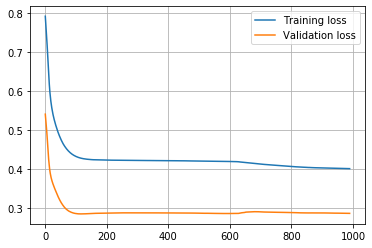

In [153]:
plt.plot(train_losses[10:], label='Training loss')
plt.plot(val_losses[10:], label='Validation loss')
plt.grid()
plt.legend()

In [154]:
print("Predicted Values:\n")
with torch.no_grad():
    for i in range(10):
        m = model(train_batch[0][i])
        print(round(m.item()))
        
        
df2.head(10)

Predicted Values:

5
5
5
6
5
5
5
5
5
6


,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
8,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [156]:
correct=0
i=0
res=[]
with torch.no_grad():
    for batch in test_batch :
        for j in range(len(batch)):
            x = model(batch[j])
            #print(round(x.item()))
            res.append(round(x.item()))

true_labels= list(test["Quality"])

for i in range(len(res)):
    if res[i]==int(true_labels[i]):
        correct+=1
        
print("Accuracy:", correct/len(res))

Accuracy: 0.592964824120603
